In [52]:
import pandas as pd
from sklearn.metrics import cohen_kappa_score

In [53]:
gpt_evaluation = pd.read_csv('gpt-4_results_fcds_clean.csv').iloc[39:]
gpt_evaluation.reset_index(inplace=True)

human_evaluation = pd.read_excel("Question_Evaluation (2).xlsx")
grade_mapping = {"Poor": 0, 'Fair':1, 'Good': 2}
human_evaluation['Question Evaluation'] = human_evaluation['Question Evaluation'].replace(grade_mapping)
human_evaluation = human_evaluation[0:40]
human_evaluation.reset_index(inplace=True)

In [54]:
# List of categorical variables
gpt_evaluation.rename(columns={'question_grade': 'Grade','gramatical_accuracy': 'Grammatical Accuracy','ambiguous_or_unclear': 'Ambiguous','gratuitous_information': 'Gratuitous Info','pedagogical_value': 'Pedagogical Value','covers_key_concept': 'Key Concept Coverage'}, inplace=True)
human_evaluation.rename(columns={'Question Evaluation': 'Grade','Rubric Item 1': 'Grammatical Accuracy','Rubric Item 2': 'Ambiguous','Rubric Item 3': 'Gratuitous Info','Rubric Item 4': 'Pedagogical Value','Rubric Item 5': 'Key Concept Coverage'}, inplace=True)

categorical_variables = ['Grammatical Accuracy', 'Ambiguous', 'Gratuitous Info', 'Pedagogical Value', 'Key Concept Coverage', 'Grade']

# Calculating Cohen's Kappa for each variable
kappa_scores = {}
for var in categorical_variables:
    kappa = cohen_kappa_score(gpt_evaluation[var].values.tolist(), [int(x) for x in human_evaluation[var].values.tolist()])
    kappa_scores[var] = kappa

print(kappa_scores)

{'Grammatical Accuracy': 0.0, 'Ambiguous': 0.36363636363636365, 'Gratuitous Info': -0.026490066225165476, 'Pedagogical Value': 0.21875, 'Key Concept Coverage': 0.09090909090909094, 'Grade': 0.20454545454545459}


In [55]:
gramatical_accuracy = (gpt_evaluation['Grammatical Accuracy'] == human_evaluation['Grammatical Accuracy']).sum()
ambiguous = (gpt_evaluation['Ambiguous'] == human_evaluation['Ambiguous']).sum()
gratuitous = (gpt_evaluation['Gratuitous Info'] == human_evaluation['Gratuitous Info']).sum()
pedagogical = (gpt_evaluation['Pedagogical Value'] == human_evaluation['Pedagogical Value']).sum()
concept = (gpt_evaluation['Key Concept Coverage'] == human_evaluation['Key Concept Coverage']).sum()
question_eval = (gpt_evaluation['Grade'] == human_evaluation['Grade']).sum()

print(f'Human Grammar: {human_evaluation["Grammatical Accuracy"].sum()}')
print(f'Human Ambiguous: {human_evaluation["Ambiguous"].sum()}')
print(f'Human Gratuitous: {human_evaluation["Gratuitous Info"].sum()}')
print(f'Human Pedagogical: {human_evaluation["Pedagogical Value"].sum()}')
print(f'Human Key Concept Coverage: {human_evaluation["Key Concept Coverage"].sum()}')
print(f'Human Grades: {human_evaluation["Grade"].value_counts()}')

print(f'GPT Grammar: {gpt_evaluation["Grammatical Accuracy"].sum()}')
print(f'GPT Ambiguous: {gpt_evaluation["Ambiguous"].sum()}')
print(f'GPT Gratuitous: {gpt_evaluation["Gratuitous Info"].sum()}')
print(f'GPT Pedagogical: {gpt_evaluation["Pedagogical Value"].sum()}')
print(f'GPT Key Concept Coverage: {gpt_evaluation["Key Concept Coverage"].sum()}')
print(f'GPT Grades: {gpt_evaluation["Grade"].value_counts()}')

print(f"Number of matching rows (grammar): {gramatical_accuracy}")
print(f"Number of matching rows (ambiguous): {ambiguous}")
print(f"Number of matching rows (gratuitous): {gratuitous}")
print(f"Number of matching rows (pedagogical): {pedagogical}")
print(f"Number of matching rows (covers concept): {concept}")
print(f"Number of matching rows (question grade): {question_eval}")

Human Grammar: 39.0
Human Ambiguous: 35.0
Human Gratuitous: 3.0
Human Pedagogical: 37.0
Human Key Concept Coverage: 38.0
Human Grades: 2.0    30
1.0     8
0.0     2
Name: Grade, dtype: int64
GPT Grammar: 40
GPT Ambiguous: 32
GPT Gratuitous: 32
GPT Pedagogical: 36
GPT Key Concept Coverage: 30
GPT Grades: 2    27
1    10
0     3
Name: Grade, dtype: int64
Number of matching rows (grammar): 39
Number of matching rows (ambiguous): 33
Number of matching rows (gratuitous): 9
Number of matching rows (pedagogical): 35
Number of matching rows (covers concept): 30
Number of matching rows (question grade): 26


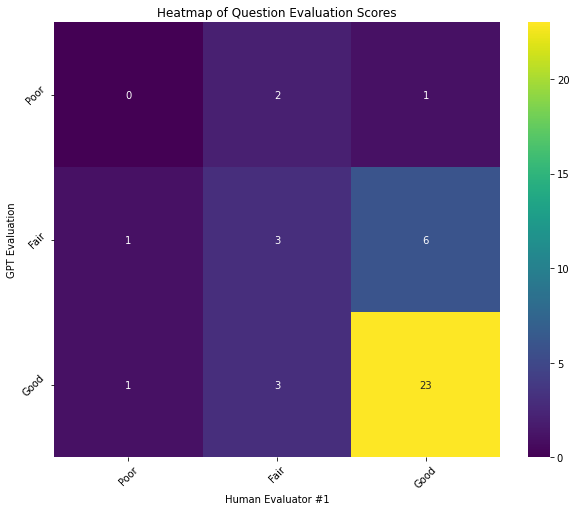

In [56]:
contingency_table = pd.crosstab(gpt_evaluation['Grade'], human_evaluation['Grade'])
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with 'sns.heatmap()'
ax = sns.heatmap(contingency_table, annot=True, fmt='d', cmap='viridis')

# Add some labels and a title for clarity
plt.title('Heatmap of Question Evaluation Scores')

# Set the labels for the ticks
ax.set_xticklabels(['Poor', 'Fair', 'Good'])
ax.set_yticklabels(['Poor', 'Fair', 'Good'])

# Set the labels for the axes
plt.xlabel('Human Evaluator #1')
plt.ylabel('GPT Evaluation')

# Rotate the tick labels for aesthetics (optional)
plt.xticks(rotation=45)
plt.yticks(rotation=45)

# Show the plot
plt.show()

In [57]:
percent_agreement = {}
for var in categorical_variables:
    agreement = ((gpt_evaluation[var] == human_evaluation[var]).sum())/len(gpt_evaluation)
    percent_agreement[var] = agreement

print(percent_agreement)

{'Grammatical Accuracy': 0.975, 'Ambiguous': 0.825, 'Gratuitous Info': 0.225, 'Pedagogical Value': 0.875, 'Key Concept Coverage': 0.75, 'Grade': 0.65}


In [58]:
gpt_evaluation = pd.read_csv('gpt-4_results_fcds_clean.csv')
gpt_evaluation.reset_index(inplace=True)

human_evaluation = pd.read_csv("fcds_eval.csv")[:-1]
grade_mapping = {"Poor": 0, 'Fair':1, 'Good': 2}
human_evaluation['Question Evaluation'] = human_evaluation['Question Evaluation'].replace(grade_mapping)
human_evaluation.reset_index(inplace=True)

In [59]:
# List of categorical variables
gpt_evaluation.rename(columns={'question_grade': 'Grade','gramatical_accuracy': 'Grammatical Accuracy','ambiguous_or_unclear': 'Ambiguous','gratuitous_information': 'Gratuitous Info','pedagogical_value': 'Pedagogical Value','covers_key_concept': 'Key Concept Coverage'}, inplace=True)
human_evaluation.rename(columns={'Question Evaluation': 'Grade','Rubric Item 1': 'Grammatical Accuracy','Rubric Item 2': 'Ambiguous','Rubric Item 3': 'Gratuitous Info','Rubric Item 4': 'Pedagogical Value','Rubric Item 5': 'Key Concept Coverage'}, inplace=True)

categorical_variables = ['Grammatical Accuracy', 'Ambiguous', 'Gratuitous Info', 'Pedagogical Value', 'Key Concept Coverage', 'Grade']

# Calculating Cohen's Kappa for each variable
kappa_scores = {}
for var in categorical_variables:
    kappa = cohen_kappa_score(gpt_evaluation[var].values.tolist(), [int(x) for x in human_evaluation[var].values.tolist()])
    kappa_scores[var] = kappa

print(kappa_scores)

{'Grammatical Accuracy': 0.21262458471760792, 'Ambiguous': -0.05236564079007788, 'Gratuitous Info': 0.2547169811320755, 'Pedagogical Value': 0.427536231884058, 'Key Concept Coverage': 0.16135881104033978, 'Grade': 0.15104477611940303}


In [60]:
percent_agreement = {}
for var in categorical_variables:
    agreement = ((gpt_evaluation[var] == human_evaluation[var]).sum())/len(gpt_evaluation)
    percent_agreement[var] = agreement

print(percent_agreement)

{'Grammatical Accuracy': 0.9240506329113924, 'Ambiguous': 0.6329113924050633, 'Gratuitous Info': 0.7468354430379747, 'Pedagogical Value': 0.8734177215189873, 'Key Concept Coverage': 0.620253164556962, 'Grade': 0.5443037974683544}


In [61]:
gramatical_accuracy = (gpt_evaluation['Grammatical Accuracy'] == human_evaluation['Grammatical Accuracy']).sum()
ambiguous = (gpt_evaluation['Ambiguous'] == human_evaluation['Ambiguous']).sum()
gratuitous = (gpt_evaluation['Gratuitous Info'] == human_evaluation['Gratuitous Info']).sum()
pedagogical = (gpt_evaluation['Pedagogical Value'] == human_evaluation['Pedagogical Value']).sum()
concept = (gpt_evaluation['Key Concept Coverage'] == human_evaluation['Key Concept Coverage']).sum()
question_eval = (gpt_evaluation['Grade'] == human_evaluation['Grade']).sum()

print(f'Human Grammar: {human_evaluation["Grammatical Accuracy"].sum()}')
print(f'Human Ambiguous: {human_evaluation["Ambiguous"].sum()}')
print(f'Human Gratuitous: {human_evaluation["Gratuitous Info"].sum()}')
print(f'Human Pedagogical: {human_evaluation["Pedagogical Value"].sum()}')
print(f'Human Key Concept Coverage: {human_evaluation["Key Concept Coverage"].sum()}')
print(f'Human Grades: {human_evaluation["Grade"].value_counts()}')

print(f'GPT Grammar: {gpt_evaluation["Grammatical Accuracy"].sum()}')
print(f'GPT Ambiguous: {gpt_evaluation["Ambiguous"].sum()}')
print(f'GPT Gratuitous: {gpt_evaluation["Gratuitous Info"].sum()}')
print(f'GPT Pedagogical: {gpt_evaluation["Pedagogical Value"].sum()}')
print(f'GPT Key Concept Coverage: {gpt_evaluation["Key Concept Coverage"].sum()}')
print(f'GPT Grades: {gpt_evaluation["Grade"].value_counts()}')

print(f"Percent Agreement (grammar): {gramatical_accuracy/len(gpt_evaluation)}")
print(f"Percent Agreement (ambiguous): {ambiguous/len(gpt_evaluation)}")
print(f"Percent Agreement (gratuitous): {gratuitous/len(gpt_evaluation)}")
print(f"Percent Agreement (pedagogical): {pedagogical/len(gpt_evaluation)}")
print(f"Percent Agreement (covers concept): {concept/len(gpt_evaluation)}")
print(f"Percent Agreement (question grade): {question_eval/len(gpt_evaluation)}")

Human Grammar: 74
Human Ambiguous: 65
Human Gratuitous: 74
Human Pedagogical: 69
Human Key Concept Coverage: 55
Human Grades: 2    48
1    20
0    11
Name: Grade, dtype: int64
GPT Grammar: 76
GPT Ambiguous: 58
GPT Gratuitous: 54
GPT Pedagogical: 69
GPT Key Concept Coverage: 49
GPT Grades: 2    51
1    15
0    13
Name: Grade, dtype: int64
Percent Agreement (grammar): 0.9240506329113924
Percent Agreement (ambiguous): 0.6329113924050633
Percent Agreement (gratuitous): 0.7468354430379747
Percent Agreement (pedagogical): 0.8734177215189873
Percent Agreement (covers concept): 0.620253164556962
Percent Agreement (question grade): 0.5443037974683544


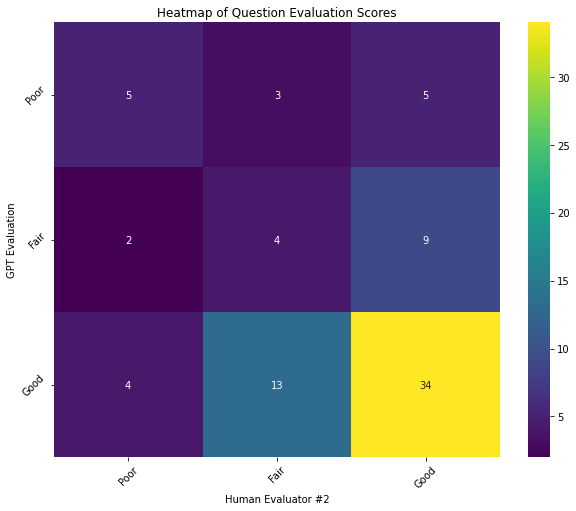

In [62]:
contingency_table = pd.crosstab(gpt_evaluation['Grade'], human_evaluation['Grade'])
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with 'sns.heatmap()'
ax = sns.heatmap(contingency_table, annot=True, fmt='d', cmap='viridis')

# Add some labels and a title for clarity
plt.title('Heatmap of Question Evaluation Scores')

# Set the labels for the ticks
ax.set_xticklabels(['Poor', 'Fair', 'Good'])
ax.set_yticklabels(['Poor', 'Fair', 'Good'])

# Set the labels for the axes
plt.xlabel('Human Evaluator #2')
plt.ylabel('GPT Evaluation')

# Rotate the tick labels for aesthetics (optional)
plt.xticks(rotation=45)
plt.yticks(rotation=45)

# Show the plot
plt.show()

In [63]:
# Create a dictionary to hold the indices for each category
category_indices = {
    'poor_poor': [],
    'poor_fair': [],
    'poor_good': [],
    'fair_poor': [],
    'fair_fair': [],
    'fair_good': [],
    'good_poor': [],
    'good_fair': [],
    'good_good': [],
}

# Loop over the DataFrame and populate the dictionary
for index, (grade1, grade2) in enumerate(zip(gpt_evaluation['Grade'], human_evaluation['Grade'])):
    if grade1 == 0 and grade2 == 0:
        category_indices['poor_poor'].append(index)
    elif grade1 == 0 and grade2 == 1:
        category_indices['poor_fair'].append(index)
    elif grade1 == 0 and grade2 == 2:
        category_indices['poor_good'].append(index)
    elif grade1 == 1 and grade2 == 0:
        category_indices['fair_poor'].append(index)
    elif grade1 == 1 and grade2 == 1:
        category_indices['fair_fair'].append(index)
    elif grade1 == 1 and grade2 == 2:
        category_indices['fair_good'].append(index)
    elif grade1 == 2 and grade2 == 0:
        category_indices['good_poor'].append(index)
    elif grade1 == 2 and grade2 == 1:
        category_indices['good_fair'].append(index)
    elif grade1 == 2 and grade2 == 2:
        category_indices['good_good'].append(index)

# Now you can access the indices for each category
# For example, to get the indices for 'fair_good' evaluations:
fair_good_indices = category_indices['fair_good']
poor_poor_indices = category_indices['poor_poor']
import re

# Define a function to clean questions that do not start with a letter
def clean_questions(questions):
    cleaned_questions = []
    for question in questions:
        # Remove leading non-letter characters
        cleaned_question = re.sub(r'^[^A-Za-z]+', '', question)
        cleaned_questions.append(cleaned_question)
    return cleaned_questions

def get_questions_from_indices(df, indices):
    return clean_questions(df.loc[indices, 'question'].tolist())
    

print(f'Questions rated poor by both: \n')
for question in get_questions_from_indices(gpt_evaluation, category_indices["poor_poor"]):
    print(question)
print('\n')
print(f'Questions rated poor by GPT, fair by Human: \n')
for question in get_questions_from_indices(gpt_evaluation, category_indices["poor_fair"]):
    print(question)
print('\n')
print(f'Questions rated poor by GPT, good by Human: \n')
for question in get_questions_from_indices(gpt_evaluation, category_indices["poor_good"]):
    print(question)
print('\n')
print(f'Questions rated fair by GPT, poor by Human: \n')
for question in get_questions_from_indices(gpt_evaluation, category_indices["fair_poor"]):
    print(question)
print('\n')
print(f'Questions rated fair by GPT, fair by Human: \n')
for question in get_questions_from_indices(gpt_evaluation, category_indices["fair_fair"]):
    print(question)
print('\n')
print(f'Questions rated fair by GPT, good by Human: \n')
for question in get_questions_from_indices(gpt_evaluation, category_indices["fair_good"]):
    print(question)
print('\n')
print(f'Questions rated good by GPT, poor by Human: \n')
for question in get_questions_from_indices(gpt_evaluation, category_indices["good_poor"]):
    print(question)
print('\n')
print(f'Questions rated good by GPT, fair by Human: \n')
for question in get_questions_from_indices(gpt_evaluation, category_indices["good_fair"]):
    print(question)
print('\n')
print(f'Questions rated good by GPT, good by Human: \n')
for question in get_questions_from_indices(gpt_evaluation, category_indices["good_good"]):
    print(question)



Questions rated poor by both: 

n<!DOCTYPE workbook_page PUBLIC..."?
When did Kaushik become a fellow and alumni mentor at the Insights Data Science program?
What does the Workbook page ID f9851381ff604681bddf45844c5dcee1 represent?
What is the significance of the title "Module 15 Summary" in this XML document?
What is the significance of the title "New Page" in this XML document?


Questions rated poor by GPT, fair by Human: 

What strategies can be used for effective customer acquisition in the automotive services industry?
How should the business objective be stated to propose a solution vision?
When should team members be assigned to specific tasks in a project?


Questions rated poor by GPT, good by Human: 

How does the project team Evaluate Requirements?
What are the technical and temporal limitations of transparency?
What are the components of system requirements in the context of software development?
How do business requirements influence the proposed changes in a business?
W

In [64]:
gpt_evaluation = pd.read_csv('gpt-4_results_chem_clean.csv')
gpt_evaluation.reset_index(inplace=True)

human_evaluation = pd.read_excel("chem_eval.xlsx").iloc[0:50]
grade_mapping = {"Poor": 0, 'Fair':1, 'Good': 2}
human_evaluation['Question Evaluation'] = human_evaluation['Question Evaluation'].replace(grade_mapping)
human_evaluation.reset_index(inplace=True)

In [65]:
# List of categorical variables
gpt_evaluation.rename(columns={'question_grade': 'Grade','gramatical_accuracy': 'Grammatical Accuracy','ambiguous_or_unclear': 'Ambiguous','gratuitous_information': 'Gratuitous Info','pedagogical_value': 'Pedagogical Value','covers_key_concept': 'Key Concept Coverage'}, inplace=True)
human_evaluation.rename(columns={'Question Evaluation': 'Grade','Column1': 'Grammatical Accuracy','Column2': 'Ambiguous','Column3': 'Gratuitous Info','Column4': 'Pedagogical Value','Column5': 'Key Concept Coverage'}, inplace=True)

categorical_variables = ['Grammatical Accuracy', 'Ambiguous', 'Gratuitous Info', 'Pedagogical Value', 'Key Concept Coverage', 'Grade']

# Calculating Cohen's Kappa for each variable
kappa_scores = {}
for var in categorical_variables:
    kappa = cohen_kappa_score(gpt_evaluation[var].values.tolist(), [int(x) for x in human_evaluation[var].values.tolist()])
    kappa_scores[var] = kappa

print(kappa_scores)

{'Grammatical Accuracy': 0.0, 'Ambiguous': 0.33734939759036153, 'Gratuitous Info': 0.11642411642411632, 'Pedagogical Value': 0.15426251691474968, 'Key Concept Coverage': 0.32432432432432434, 'Grade': 0.10665944775311331}


In [66]:
percent_agreement = {}
for var in categorical_variables:
    agreement = ((gpt_evaluation[var] == human_evaluation[var]).sum())/len(gpt_evaluation)
    percent_agreement[var] = agreement

print(percent_agreement)

{'Grammatical Accuracy': 0.92, 'Ambiguous': 0.78, 'Gratuitous Info': 0.66, 'Pedagogical Value': 0.5, 'Key Concept Coverage': 0.7, 'Grade': 0.34}


In [67]:
gramatical_accuracy = (gpt_evaluation['Grammatical Accuracy'] == human_evaluation['Grammatical Accuracy']).sum()
ambiguous = (gpt_evaluation['Ambiguous'] == human_evaluation['Ambiguous']).sum()
gratuitous = (gpt_evaluation['Gratuitous Info'] == human_evaluation['Gratuitous Info']).sum()
pedagogical = (gpt_evaluation['Pedagogical Value'] == human_evaluation['Pedagogical Value']).sum()
concept = (gpt_evaluation['Key Concept Coverage'] == human_evaluation['Key Concept Coverage']).sum()
question_eval = (gpt_evaluation['Grade'] == human_evaluation['Grade']).sum()

print(f'Human Grammar: {human_evaluation["Grammatical Accuracy"].sum()}')
print(f'Human Ambiguous: {human_evaluation["Ambiguous"].sum()}')
print(f'Human Gratuitous: {human_evaluation["Gratuitous Info"].sum()}')
print(f'Human Pedagogical: {human_evaluation["Pedagogical Value"].sum()}')
print(f'Human Key Concept Coverage: {human_evaluation["Key Concept Coverage"].sum()}')
print(f'Human Grades: {human_evaluation["Grade"].value_counts()}')

print(f'GPT Grammar: {gpt_evaluation["Grammatical Accuracy"].sum()}')
print(f'GPT Ambiguous: {gpt_evaluation["Ambiguous"].sum()}')
print(f'GPT Gratuitous: {gpt_evaluation["Gratuitous Info"].sum()}')
print(f'GPT Pedagogical: {gpt_evaluation["Pedagogical Value"].sum()}')
print(f'GPT Key Concept Coverage: {gpt_evaluation["Key Concept Coverage"].sum()}')
print(f'GPT Grades: {gpt_evaluation["Grade"].value_counts()}')

print(f"Number of matching rows (grammar): {gramatical_accuracy}")
print(f"Number of matching rows (ambiguous): {ambiguous}")
print(f"Number of matching rows (gratuitous): {gratuitous}")
print(f"Number of matching rows (pedagogical): {pedagogical}")
print(f"Number of matching rows (covers concept): {concept}")
print(f"Number of matching rows (question grade): {question_eval}")

Human Grammar: 46
Human Ambiguous: 39
Human Gratuitous: 41
Human Pedagogical: 19
Human Key Concept Coverage: 39
Human Grades: 0    31
1    10
2     9
Name: Grade, dtype: int64
GPT Grammar: 50
GPT Ambiguous: 40
GPT Gratuitous: 34
GPT Pedagogical: 44
GPT Key Concept Coverage: 30
GPT Grades: 2    36
0     9
1     5
Name: Grade, dtype: int64
Number of matching rows (grammar): 46
Number of matching rows (ambiguous): 39
Number of matching rows (gratuitous): 33
Number of matching rows (pedagogical): 25
Number of matching rows (covers concept): 35
Number of matching rows (question grade): 17


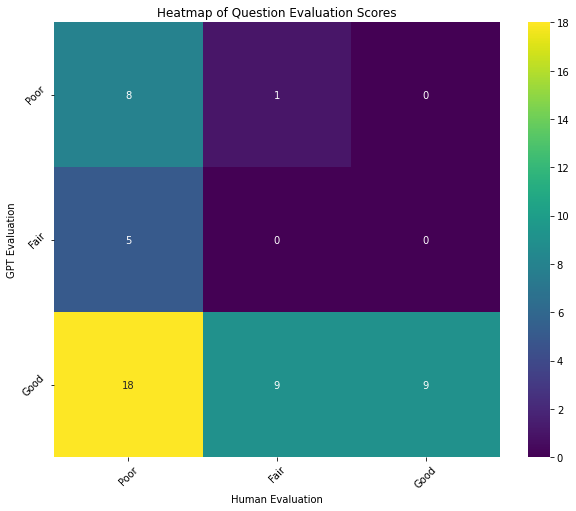

In [68]:
contingency_table = pd.crosstab(gpt_evaluation['Grade'], human_evaluation['Grade'])
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with 'sns.heatmap()'
ax = sns.heatmap(contingency_table, annot=True, fmt='d', cmap='viridis')

# Add some labels and a title for clarity
plt.title('Heatmap of Question Evaluation Scores')

# Set the labels for the ticks
ax.set_xticklabels(['Poor', 'Fair', 'Good'])
ax.set_yticklabels(['Poor', 'Fair', 'Good'])

# Set the labels for the axes
plt.xlabel('Human Evaluation')
plt.ylabel('GPT Evaluation')

# Rotate the tick labels for aesthetics (optional)
plt.xticks(rotation=45)
plt.yticks(rotation=45)

# Show the plot
plt.show()

In [69]:
display(gpt_evaluation.head())

,index,question,Grammatical Accuracy,Ambiguous,Gratuitous Info,Pedagogical Value,Key Concept Coverage,concept_covered,Grade
0,0,How do ionic equations differ from regular ch...,1,1,1,1,1,"Chemical equations: Summary, Symbolic represen...",2
1,1,Why are integer coefficients used in chemical...,1,1,1,1,1,The concept most closely related to the questi...,2
2,2,How does the equilibrium vapor pressure of a l...,1,1,1,1,1,The concept that is most closely related to th...,2
3,3,What is the source of this information about m...,1,0,0,1,0,The concept that is most closely related to th...,1
4,4,How does completing the activity help you prep...,1,1,0,0,0,Chemical Reactions and Equations Apply What Yo...,0


In [70]:
# Create a dictionary to hold the indices for each category
category_indices = {
    'poor_poor': [],
    'poor_fair': [],
    'poor_good': [],
    'fair_poor': [],
    'fair_fair': [],
    'fair_good': [],
    'good_poor': [],
    'good_fair': [],
    'good_good': [],
}

# Loop over the DataFrame and populate the dictionary
for index, (grade1, grade2) in enumerate(zip(gpt_evaluation['Grade'], human_evaluation['Grade'])):
    if grade1 == 0 and grade2 == 0:
        category_indices['poor_poor'].append(index)
    elif grade1 == 0 and grade2 == 1:
        category_indices['poor_fair'].append(index)
    elif grade1 == 0 and grade2 == 2:
        category_indices['poor_good'].append(index)
    elif grade1 == 1 and grade2 == 0:
        category_indices['fair_poor'].append(index)
    elif grade1 == 1 and grade2 == 1:
        category_indices['fair_fair'].append(index)
    elif grade1 == 1 and grade2 == 2:
        category_indices['fair_good'].append(index)
    elif grade1 == 2 and grade2 == 0:
        category_indices['good_poor'].append(index)
    elif grade1 == 2 and grade2 == 1:
        category_indices['good_fair'].append(index)
    elif grade1 == 2 and grade2 == 2:
        category_indices['good_good'].append(index)

# Now you can access the indices for each category
# For example, to get the indices for 'fair_good' evaluations:
fair_good_indices = category_indices['fair_good']
poor_poor_indices = category_indices['poor_poor']
import re

# Define a function to clean questions that do not start with a letter
def clean_questions(questions):
    cleaned_questions = []
    for question in questions:
        # Remove leading non-letter characters
        cleaned_question = re.sub(r'^[^A-Za-z]+', '', question)
        cleaned_questions.append(cleaned_question)
    return cleaned_questions

def get_questions_from_indices(df, indices):
    return clean_questions(df.loc[indices, 'question'].tolist())
    

print(f'Questions rated poor by both: \n')
for question in get_questions_from_indices(gpt_evaluation, category_indices["poor_poor"]):
    print(question)
print('\n')
print(f'Questions rated poor by GPT, fair by Human: \n')
for question in get_questions_from_indices(gpt_evaluation, category_indices["poor_fair"]):
    print(question)
print('\n')
print(f'Questions rated poor by GPT, good by Human: \n')
for question in get_questions_from_indices(gpt_evaluation, category_indices["poor_good"]):
    print(question)
print('\n')
print(f'Questions rated fair by GPT, poor by Human: \n')
for question in get_questions_from_indices(gpt_evaluation, category_indices["fair_poor"]):
    print(question)
print('\n')
print(f'Questions rated fair by GPT, fair by Human: \n')
for question in get_questions_from_indices(gpt_evaluation, category_indices["fair_fair"]):
    print(question)
print('\n')
print(f'Questions rated fair by GPT, good by Human: \n')
for question in get_questions_from_indices(gpt_evaluation, category_indices["fair_good"]):
    print(question)
print('\n')
print(f'Questions rated good by GPT, poor by Human: \n')
for question in get_questions_from_indices(gpt_evaluation, category_indices["good_poor"]):
    print(question)
print('\n')
print(f'Questions rated good by GPT, fair by Human: \n')
for question in get_questions_from_indices(gpt_evaluation, category_indices["good_fair"]):
    print(question)
print('\n')
print(f'Questions rated good by GPT, good by Human: \n')
for question in get_questions_from_indices(gpt_evaluation, category_indices["good_good"]):
    print(question)





Questions rated poor by both: 

How does completing the activity help you prepare for the module quiz?
When should I attempt Question 2 in the Extra Practice: Gas Laws workbook?
What is the purpose of the "My Response" link in a module?
How can the content from Openstax Chemistry be downloaded?
What is the beta state of an electron and when does it occur?
When did the supernova explosion that created the Crab Nebula occur?
How does the adaptive activity select questions based on your performance in the module?
Creative Commons Attribution 4.0 License: What are the terms of the Creative Commons Attribution 4.0 License?


Questions rated poor by GPT, fair by Human: 

When does an object have high thermal energy?


Questions rated poor by GPT, good by Human: 



Questions rated fair by GPT, poor by Human: 

What is the source of this information about molecular compounds?
How do insulators interact with electric fields and how does this relate to their molecular structure?
Why are X-rays 

In [71]:
gpt_evaluation = pd.read_csv('fcds_eval.csv').iloc[0:40]
grade_mapping = {"Poor": 0, 'Fair':1, 'Good': 2}
gpt_evaluation['Question Evaluation'] = gpt_evaluation['Question Evaluation'].replace(grade_mapping)
gpt_evaluation.reset_index(inplace=True)

human_evaluation = pd.read_excel("Question_Evaluation (2).xlsx")
grade_mapping = {"Poor": 0, 'Fair':1, 'Good': 2}
human_evaluation['Question Evaluation'] = human_evaluation['Question Evaluation'].replace(grade_mapping)
human_evaluation = human_evaluation[0:40]
human_evaluation.reset_index(inplace=True)

In [72]:
gpt_evaluation.rename(columns={'Question Evaluation': 'Grade','Rubric Item 1': 'Grammatical Accuracy','Rubric Item 2': 'Ambiguous','Rubric Item 3': 'Gratuitous Info','Rubric Item 4': 'Pedagogical Value','Rubric Item 5': 'Key Concept Coverage'}, inplace=True)
human_evaluation.rename(columns={'Question Evaluation': 'Grade','Rubric Item 1': 'Grammatical Accuracy','Rubric Item 2': 'Ambiguous','Rubric Item 3': 'Gratuitous Info','Rubric Item 4': 'Pedagogical Value','Rubric Item 5': 'Key Concept Coverage'}, inplace=True)

categorical_variables = ['Grammatical Accuracy', 'Ambiguous', 'Gratuitous Info', 'Pedagogical Value', 'Key Concept Coverage', 'Grade']

# Calculating Cohen's Kappa for each variable
kappa_scores = {}
for var in categorical_variables:
    kappa = cohen_kappa_score(gpt_evaluation[var].values.tolist(), [int(x) for x in human_evaluation[var].values.tolist()])
    kappa_scores[var] = kappa

print(kappa_scores)

{'Grammatical Accuracy': -0.04347826086956519, 'Ambiguous': -0.1707317073170731, 'Gratuitous Info': 0.022900763358778664, 'Pedagogical Value': 0.10614525139664799, 'Key Concept Coverage': -0.0843373493975903, 'Grade': -0.1797752808988764}


In [73]:
percent_agreement = {}
for var in categorical_variables:
    agreement = ((gpt_evaluation[var] == human_evaluation[var]).sum())/len(gpt_evaluation)
    percent_agreement[var] = agreement

print(percent_agreement)

{'Grammatical Accuracy': 0.85, 'Ambiguous': 0.7, 'Gratuitous Info': 0.2, 'Pedagogical Value': 0.8, 'Key Concept Coverage': 0.775, 'Grade': 0.475}


In [74]:
gramatical_accuracy = (gpt_evaluation['Grammatical Accuracy'] == human_evaluation['Grammatical Accuracy']).sum()
ambiguous = (gpt_evaluation['Ambiguous'] == human_evaluation['Ambiguous']).sum()
gratuitous = (gpt_evaluation['Gratuitous Info'] == human_evaluation['Gratuitous Info']).sum()
pedagogical = (gpt_evaluation['Pedagogical Value'] == human_evaluation['Pedagogical Value']).sum()
concept = (gpt_evaluation['Key Concept Coverage'] == human_evaluation['Key Concept Coverage']).sum()
question_eval = (gpt_evaluation['Grade'] == human_evaluation['Grade']).sum()

print(f'Human Grammar: {human_evaluation["Grammatical Accuracy"].sum()}')
print(f'Human Ambiguous: {human_evaluation["Ambiguous"].sum()}')
print(f'Human Gratuitous: {human_evaluation["Gratuitous Info"].sum()}')
print(f'Human Pedagogical: {human_evaluation["Pedagogical Value"].sum()}')
print(f'Human Key Concept Coverage: {human_evaluation["Key Concept Coverage"].sum()}')
print(f'Human Grades: {human_evaluation["Grade"].value_counts()}')

print(f'GPT Grammar: {gpt_evaluation["Grammatical Accuracy"].sum()}')
print(f'GPT Ambiguous: {gpt_evaluation["Ambiguous"].sum()}')
print(f'GPT Gratuitous: {gpt_evaluation["Gratuitous Info"].sum()}')
print(f'GPT Pedagogical: {gpt_evaluation["Pedagogical Value"].sum()}')
print(f'GPT Key Concept Coverage: {gpt_evaluation["Key Concept Coverage"].sum()}')
print(f'GPT Grades: {gpt_evaluation["Grade"].value_counts()}')

print(f"Percent Agreement (grammar): {gramatical_accuracy/len(gpt_evaluation)}")
print(f"Percent Agreement (ambiguous): {ambiguous/len(gpt_evaluation)}")
print(f"Percent Agreement (gratuitous): {gratuitous/len(gpt_evaluation)}")
print(f"Percent Agreement (pedagogical): {pedagogical/len(gpt_evaluation)}")
print(f"Percent Agreement (covers concept): {concept/len(gpt_evaluation)}")
print(f"Percent Agreement (question grade): {question_eval/len(gpt_evaluation)}")

Human Grammar: 39.0
Human Ambiguous: 35.0
Human Gratuitous: 3.0
Human Pedagogical: 37.0
Human Key Concept Coverage: 38.0
Human Grades: 2.0    30
1.0     8
0.0     2
Name: Grade, dtype: int64
GPT Grammar: 35
GPT Ambiguous: 33
GPT Gratuitous: 35
GPT Pedagogical: 33
GPT Key Concept Coverage: 33
GPT Grades: 2    28
0     8
1     4
Name: Grade, dtype: int64
Percent Agreement (grammar): 0.85
Percent Agreement (ambiguous): 0.7
Percent Agreement (gratuitous): 0.2
Percent Agreement (pedagogical): 0.8
Percent Agreement (covers concept): 0.775
Percent Agreement (question grade): 0.475


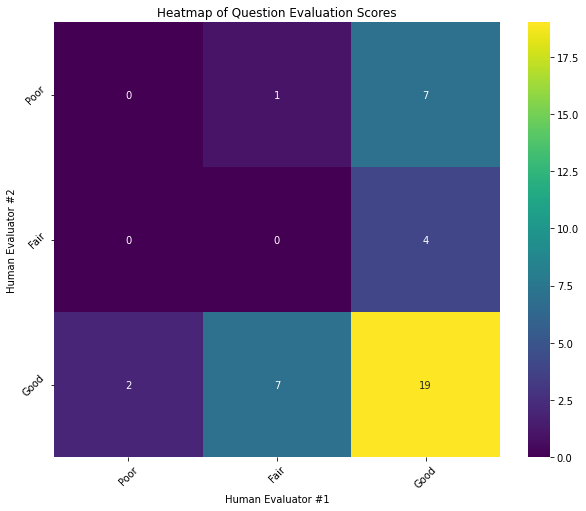

In [75]:
contingency_table = pd.crosstab(gpt_evaluation['Grade'], human_evaluation['Grade'])
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with 'sns.heatmap()'
ax = sns.heatmap(contingency_table, annot=True, fmt='d', cmap='viridis')

# Add some labels and a title for clarity
plt.title('Heatmap of Question Evaluation Scores')

# Set the labels for the ticks
ax.set_xticklabels(['Poor', 'Fair', 'Good'])
ax.set_yticklabels(['Poor', 'Fair', 'Good'])

# Set the labels for the axes
plt.xlabel('Human Evaluator #1')
plt.ylabel('Human Evaluator #2')

# Rotate the tick labels for aesthetics (optional)
plt.xticks(rotation=45)
plt.yticks(rotation=45)

# Show the plot
plt.show()

In [76]:
display(gpt_evaluation.head())

,index,Question,Grammatical Accuracy,Ambiguous,Gratuitous Info,Pedagogical Value,Key Concept Coverage,Concept Covered (If any),Grade
0,0,1,0,0,1,1,0,Expected Model,0
1,1,2,1,1,1,1,1,Measurable Metrics,2
2,2,3,1,1,1,1,1,Customer retention,2
3,3,4,0,0,1,1,1,Interpretability,1
4,4,5,1,1,1,1,1,Model Assessment and Model Selection,2
